In [1]:
import pandas as pd
from pyfolio.timeseries import perf_stats
%matplotlib inline

/home/tomek/.virtualenvs/ib/lib/python3.7/site-packages/pyfolio/pos.py:27: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  'Module "zipline.assets" not found; mutltipliers will not be applied' +


In [2]:
df = pd.read_csv('/home/tomek/ib_tools/blotter/backtest_2019-11-08_22-39.csv')
df['realizedPNL_net'] = df['realizedPNL'] - 3.02
df['cumsum'] = df.realizedPNL_net.cumsum()
df['result'] = 100000 + df['cumsum']
df['time'] = pd.to_datetime(df['time'])
df.set_index('time', inplace=True)
df

,sys_time,contract,action,amount,price,exec_ids,order_id,reason,com_exec_id,commission,currency,realizedPNL,com_sys_time,realizedPNL_net,cumsum,result
time,,,,,,,,,,,,,,,,
2018-02-09 09:28:00,2019-11-08 22:41:04.129398,GCZ9,SELL,1,1316.150,[1],1,entry,1,1.3,USD,0.0,2019-11-08 22:41:04.129520,-3.02,-3.02,99996.98
2018-02-09 13:31:00,2019-11-08 22:41:04.496455,GCZ9,BUY,1,1318.880,[2],2,stop-out,2,1.3,USD,-273.0,2019-11-08 22:41:04.496506,-276.02,-279.04,99720.96
2018-02-09 13:45:00,2019-11-08 22:41:04.547793,YM DEC 19,SELL,1,23822.100,[3],3,entry,3,1.3,USD,0.0,2019-11-08 22:41:04.547921,-3.02,-282.06,99717.94
2018-02-09 14:10:00,2019-11-08 22:41:04.626944,CLZ9,SELL,1,60.354,[4],5,entry,4,1.3,USD,0.0,2019-11-08 22:41:04.627054,-3.02,-285.08,99714.92
2018-02-09 14:39:00,2019-11-08 22:41:04.778000,YM DEC 19,BUY,1,23991.700,[5],4,stop-out,5,1.3,USD,-848.0,2019-11-08 22:41:04.778050,-851.02,-1136.10,98863.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-11-01 14:01:00,2019-11-09 00:40:02.804454,CLZ9,BUY,1,54.849,[4406],5081,entry,4406,1.3,USD,0.0,2019-11-09 00:40:02.805350,-3.02,74710.13,174710.13
2019-11-01 14:20:00,2019-11-09 00:40:03.453655,NQZ9,BUY,1,8127.975,[4407],5083,entry,4407,1.3,USD,0.0,2019-11-09 00:40:03.454567,-3.02,74707.11,174707.11
2019-11-01 14:36:00,2019-11-09 00:40:04.127382,YM DEC 19,BUY,1,27132.100,[4408],5085,entry,4408,1.3,USD,0.0,2019-11-09 00:40:04.128257,-3.02,74704.09,174704.09


In [3]:
len(df)

4410

In [4]:
df.realizedPNL.sum()

87728.25

In [5]:
df.realizedPNL_net.sum()

74410.05000000002

In [6]:
returns = pd.DataFrame()
returns['dollars'] = df['result'].resample('D').last()
returns.loc[returns.index[0] - pd.Timedelta(days=1), 'dollars'] = 100000
returns.sort_index(inplace=True)
returns.dollars.fillna(method='ffill', inplace=True)
returns['returns'] = returns['dollars'].pct_change().fillna(0)
returns

,dollars,returns
time,,
2018-02-08,100000.00,0.000000
2018-02-09,92380.04,-0.076200
2018-02-10,92380.04,0.000000
2018-02-11,92380.04,0.000000
2018-02-12,90879.57,-0.016242
...,...,...
2019-10-28,172531.89,-0.001540
2019-10-29,175293.19,0.016005
2019-10-30,176212.47,0.005244


In [7]:
perf_stats(returns['returns'])

Annual return          0.248311
Cumulative returns     0.744100
Annual volatility      0.289708
Sharpe ratio           0.907753
Calmar ratio           1.395312
Stability              0.865182
Max drawdown          -0.177961
Omega ratio            1.220219
Sortino ratio          1.692190
Skew                   1.616142
Kurtosis               6.616504
Tail ratio             1.612437
Daily value at risk   -0.035456
dtype: float64

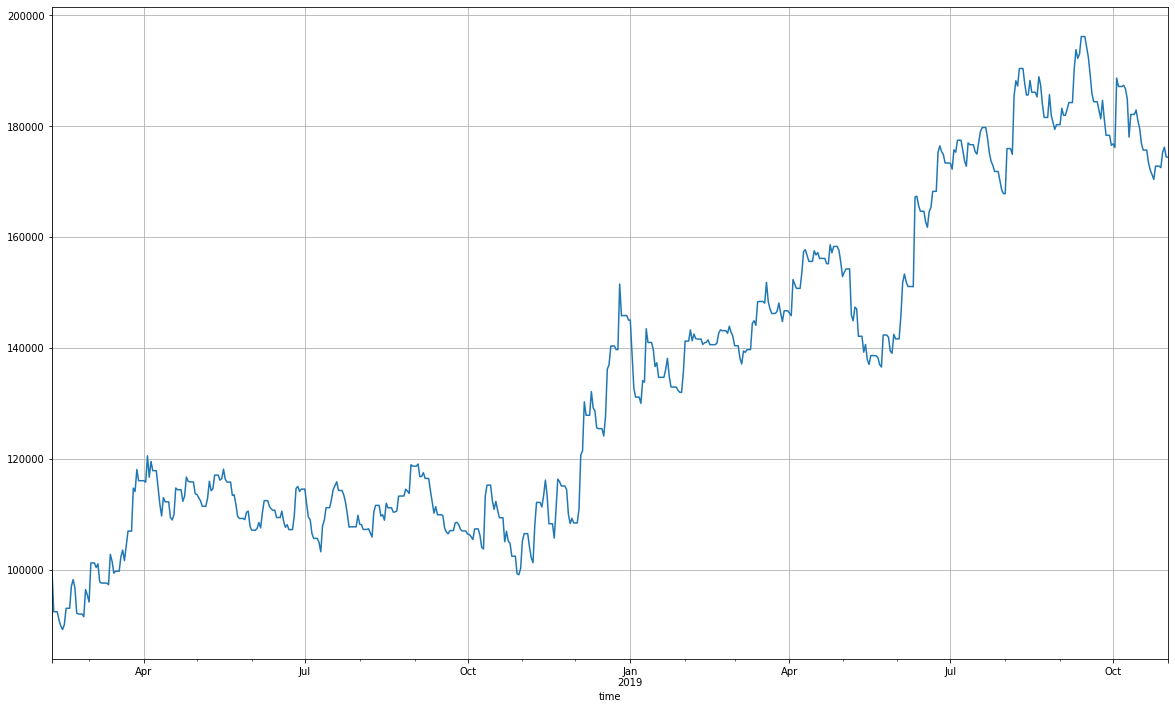

In [8]:
returns['dollars'].plot(figsize=(20,12), grid=True);

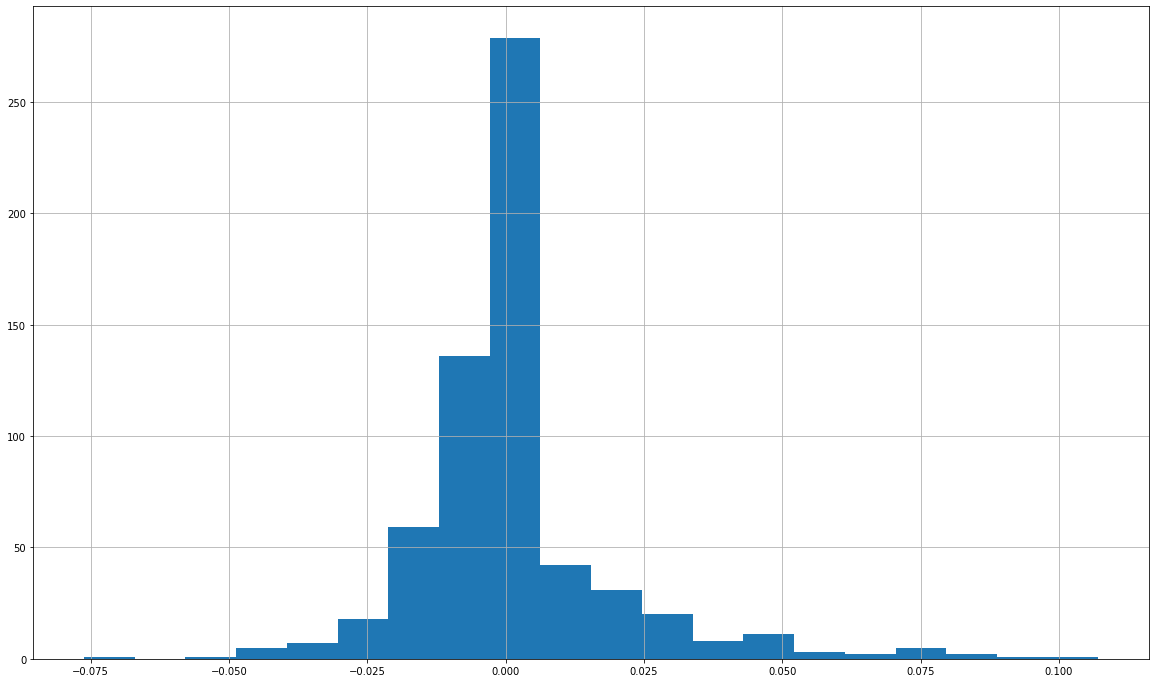

In [9]:
returns['returns'].hist(bins=20, figsize=(20,12), grid=True);

In [10]:
nq = df[df['contract'].str.startswith('NQ')]
nq

,sys_time,contract,action,amount,price,exec_ids,order_id,reason,com_exec_id,commission,currency,realizedPNL,com_sys_time,realizedPNL_net,cumsum,result
time,,,,,,,,,,,,,,,,
2018-02-09 16:50:00,2019-11-08 22:41:06.173452,NQZ9,SELL,1,6300.250,[8],9,entry,8,1.3,USD,0.0,2019-11-08 22:41:06.173560,-3.02,-1470.16,98529.84
2018-02-09 16:55:00,2019-11-08 22:41:06.205638,NQZ9,BUY,1,6348.625,[13],12,stop-out,13,1.3,USD,-967.5,2019-11-08 22:41:06.205672,-970.52,-4052.01,95947.99
2018-02-09 18:05:00,2019-11-08 22:41:06.942871,NQZ9,SELL,1,6280.100,[16],19,entry,16,1.3,USD,0.0,2019-11-08 22:41:06.942999,-3.02,-4061.07,95938.93
2018-02-09 20:10:00,2019-11-08 22:41:08.418052,NQZ9,BUY,1,6325.850,[18],20,stop-out,18,1.3,USD,-915.0,2019-11-08 22:41:08.418109,-918.02,-5913.36,94086.64
2018-02-09 21:56:00,2019-11-08 22:41:09.482153,NQZ9,BUY,1,6427.825,[21],23,entry,21,1.3,USD,0.0,2019-11-08 22:41:09.482287,-3.02,-6726.42,93273.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-10-30 19:57:00,2019-11-09 00:39:15.793091,NQZ9,BUY,1,8078.525,[4385],5059,entry,4385,1.3,USD,0.0,2019-11-09 00:39:15.793926,-3.02,76489.55,176489.55
2019-10-31 15:24:00,2019-11-09 00:39:37.219520,NQZ9,SELL,1,8059.375,[4398],5060,stop-out,4398,1.3,USD,-383.0,2019-11-09 00:39:37.219587,-386.02,74788.29,174788.29
2019-11-01 07:17:00,2019-11-09 00:39:55.292815,NQZ9,BUY,1,8120.525,[4402],5076,entry,4402,1.3,USD,0.0,2019-11-09 00:39:55.293652,-3.02,74170.71,174170.71


In [11]:
nq['realizedPNL'].sum()

42771.85

In [12]:
nq['realizedPNL_net'].sum()

40026.669999999984

In [13]:
df['symbol'] = df['contract'].str[:2]
df

,sys_time,contract,action,amount,price,exec_ids,order_id,reason,com_exec_id,commission,currency,realizedPNL,com_sys_time,realizedPNL_net,cumsum,result,symbol
time,,,,,,,,,,,,,,,,,
2018-02-09 09:28:00,2019-11-08 22:41:04.129398,GCZ9,SELL,1,1316.150,[1],1,entry,1,1.3,USD,0.0,2019-11-08 22:41:04.129520,-3.02,-3.02,99996.98,GC
2018-02-09 13:31:00,2019-11-08 22:41:04.496455,GCZ9,BUY,1,1318.880,[2],2,stop-out,2,1.3,USD,-273.0,2019-11-08 22:41:04.496506,-276.02,-279.04,99720.96,GC
2018-02-09 13:45:00,2019-11-08 22:41:04.547793,YM DEC 19,SELL,1,23822.100,[3],3,entry,3,1.3,USD,0.0,2019-11-08 22:41:04.547921,-3.02,-282.06,99717.94,YM
2018-02-09 14:10:00,2019-11-08 22:41:04.626944,CLZ9,SELL,1,60.354,[4],5,entry,4,1.3,USD,0.0,2019-11-08 22:41:04.627054,-3.02,-285.08,99714.92,CL
2018-02-09 14:39:00,2019-11-08 22:41:04.778000,YM DEC 19,BUY,1,23991.700,[5],4,stop-out,5,1.3,USD,-848.0,2019-11-08 22:41:04.778050,-851.02,-1136.10,98863.90,YM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-11-01 14:01:00,2019-11-09 00:40:02.804454,CLZ9,BUY,1,54.849,[4406],5081,entry,4406,1.3,USD,0.0,2019-11-09 00:40:02.805350,-3.02,74710.13,174710.13,CL
2019-11-01 14:20:00,2019-11-09 00:40:03.453655,NQZ9,BUY,1,8127.975,[4407],5083,entry,4407,1.3,USD,0.0,2019-11-09 00:40:03.454567,-3.02,74707.11,174707.11,NQ
2019-11-01 14:36:00,2019-11-09 00:40:04.127382,YM DEC 19,BUY,1,27132.100,[4408],5085,entry,4408,1.3,USD,0.0,2019-11-09 00:40:04.128257,-3.02,74704.09,174704.09,YM


In [14]:
df.groupby('symbol').realizedPNL.sum()

symbol
CL       -3.80
ES    29048.15
GC    -1960.20
NQ    42771.85
YM    17872.25
Name: realizedPNL, dtype: float64

In [15]:
nq = df[df['symbol'] == 'NQ']

In [53]:
df.resample('B').last().price.count()

447

In [52]:
nq.price.count() / df.resample('B').last().price.count()

2.033557046979866

In [18]:
nq.count()

sys_time           909
contract           909
action             909
amount             909
price              909
exec_ids           909
order_id           909
reason             909
com_exec_id        909
commission         909
currency           909
realizedPNL        909
com_sys_time       909
realizedPNL_net    909
cumsum             909
result             909
symbol             909
dtype: int64

In [19]:
es = df[df['symbol'] == 'ES']

In [51]:
es.price.count() / df.resample('B').last().price.count()

1.3400447427293065

In [21]:
nq

,sys_time,contract,action,amount,price,exec_ids,order_id,reason,com_exec_id,commission,currency,realizedPNL,com_sys_time,realizedPNL_net,cumsum,result,symbol
time,,,,,,,,,,,,,,,,,
2018-02-09 16:50:00,2019-11-08 22:41:06.173452,NQZ9,SELL,1,6300.250,[8],9,entry,8,1.3,USD,0.0,2019-11-08 22:41:06.173560,-3.02,-1470.16,98529.84,NQ
2018-02-09 16:55:00,2019-11-08 22:41:06.205638,NQZ9,BUY,1,6348.625,[13],12,stop-out,13,1.3,USD,-967.5,2019-11-08 22:41:06.205672,-970.52,-4052.01,95947.99,NQ
2018-02-09 18:05:00,2019-11-08 22:41:06.942871,NQZ9,SELL,1,6280.100,[16],19,entry,16,1.3,USD,0.0,2019-11-08 22:41:06.942999,-3.02,-4061.07,95938.93,NQ
2018-02-09 20:10:00,2019-11-08 22:41:08.418052,NQZ9,BUY,1,6325.850,[18],20,stop-out,18,1.3,USD,-915.0,2019-11-08 22:41:08.418109,-918.02,-5913.36,94086.64,NQ
2018-02-09 21:56:00,2019-11-08 22:41:09.482153,NQZ9,BUY,1,6427.825,[21],23,entry,21,1.3,USD,0.0,2019-11-08 22:41:09.482287,-3.02,-6726.42,93273.58,NQ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-10-30 19:57:00,2019-11-09 00:39:15.793091,NQZ9,BUY,1,8078.525,[4385],5059,entry,4385,1.3,USD,0.0,2019-11-09 00:39:15.793926,-3.02,76489.55,176489.55,NQ
2019-10-31 15:24:00,2019-11-09 00:39:37.219520,NQZ9,SELL,1,8059.375,[4398],5060,stop-out,4398,1.3,USD,-383.0,2019-11-09 00:39:37.219587,-386.02,74788.29,174788.29,NQ
2019-11-01 07:17:00,2019-11-09 00:39:55.292815,NQZ9,BUY,1,8120.525,[4402],5076,entry,4402,1.3,USD,0.0,2019-11-09 00:39:55.293652,-3.02,74170.71,174170.71,NQ


In [22]:
nq.realizedPNL.sort_values()

time
2019-10-10 00:20:00   -1264.50
2018-05-21 15:32:00   -1246.00
2019-10-10 02:00:00   -1128.50
2018-10-11 21:14:00   -1124.00
2018-10-25 22:04:00   -1088.00
                        ...   
2019-01-08 16:58:00    4451.50
2018-12-06 18:03:00    4709.50
2018-11-20 16:57:00    4934.50
2019-06-11 19:01:00    6319.64
2018-10-11 15:37:00    6320.00
Name: realizedPNL, Length: 909, dtype: float64

In [24]:
nq_ = nq[['price', 'realizedPNL']]

In [25]:
nq_

,price,realizedPNL
time,,
2018-02-09 16:50:00,6300.250,0.0
2018-02-09 16:55:00,6348.625,-967.5
2018-02-09 18:05:00,6280.100,0.0
2018-02-09 20:10:00,6325.850,-915.0
2018-02-09 21:56:00,6427.825,0.0
...,...,...
2019-10-30 19:57:00,8078.525,0.0
2019-10-31 15:24:00,8059.375,-383.0
2019-11-01 07:17:00,8120.525,0.0


In [26]:
from utils import daily_returns

In [29]:
ret = daily_returns(nq_['realizedPNL'], 15000)
ret

,balance,returns,path
time,,,
2018-02-08,15000.00,0.000000,0.000000
2018-02-09,13117.50,-0.125500,-0.125500
2018-02-12,13117.50,0.000000,-0.125500
2018-02-13,13117.50,0.000000,-0.125500
2018-02-14,14101.50,0.075014,-0.059900
...,...,...,...
2019-10-28,55466.85,0.000000,2.697790
2019-10-29,58557.35,0.055718,2.903823
2019-10-30,58557.35,0.000000,2.903823


In [30]:
perf_stats(ret['returns'])

Annual return          1.120796
Cumulative returns     2.851457
Annual volatility      0.701045
Sharpe ratio           1.403161
Calmar ratio           3.973384
Stability              0.900504
Max drawdown          -0.282076
Omega ratio            1.391401
Sortino ratio          3.094880
Skew                   2.175312
Kurtosis               7.594339
Tail ratio             2.003884
Daily value at risk   -0.084420
dtype: float64

In [31]:
ret_1 = daily_returns(nq_['realizedPNL'], nq_.price.iloc[0]*20)

In [72]:
ret_1

,balance,returns,path
time,,,
2018-02-08,126005.00,0.000000,0.000000
2018-02-09,124122.50,-0.014940,-0.014940
2018-02-12,124122.50,0.000000,-0.014940
2018-02-13,124122.50,0.000000,-0.014940
2018-02-14,125106.50,0.007928,-0.007131
...,...,...,...
2019-10-28,166471.85,0.000000,0.321153
2019-10-29,169562.35,0.018565,0.345680
2019-10-30,169562.35,0.000000,0.345680


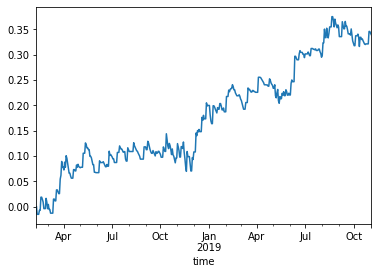

In [75]:
ret_1.path.plot();

In [33]:
s = perf_stats(ret_1['returns'])
s

Annual return          0.176965
Cumulative returns     0.339446
Annual volatility      0.136515
Sharpe ratio           1.261376
Calmar ratio           2.728891
Stability              0.927466
Max drawdown          -0.064849
Omega ratio            1.308139
Sortino ratio          2.630040
Skew                   1.651504
Kurtosis               3.663545
Tail ratio             2.087288
Daily value at risk   -0.016516
dtype: float64

In [34]:
s.loc['Sharpe ratio'] / s.loc['Annual volatility']

9.239804527167738

In [35]:
nq_[nq_ == 0].count()

price            0
realizedPNL    455
dtype: int64

In [36]:
nq_[nq_ != 0].count()

price          909
realizedPNL    454
dtype: int64

In [39]:
closes = nq_[nq_.realizedPNL != 0]

In [42]:
wins = closes[closes.realizedPNL > 0]
loses = closes[closes.realizedPNL <=0]

In [45]:
wins.price.count(), loses.price.count()

(121, 333)

In [47]:
win_percent = wins.price.count()/closes.price.count()
loss_percent = loses.price.count()/closes.price.count()
win_percent, loss_percent

(0.2665198237885463, 0.7334801762114538)

In [49]:
avg_win = wins.realizedPNL.mean()/20
avg_loss = loses.realizedPNL.mean()/20
avg_win, avg_loss

(87.89954132231404, -25.51727327327327)

In [50]:
ev = (avg_win * win_percent) + (avg_loss * loss_percent)
ev

4.710556167400881

In [55]:
nq_.realizedPNL.resample('M').sum()

time
2018-02-28     1143.00
2018-03-31     8686.61
2018-04-30      173.00
2018-05-31    -1531.50
2018-06-30     4218.27
2018-07-31     1964.50
2018-08-31      224.50
2018-09-30    -1474.64
2018-10-31    -1261.50
2018-11-30     -404.00
2018-12-31    13433.50
2019-01-31    -1583.50
2019-02-28     3166.00
2019-03-31     1683.67
2019-04-30     1718.00
2019-05-31    -2389.50
2019-06-30     9285.86
2019-07-31       96.50
2019-08-31     8043.50
2019-09-30    -4587.92
2019-10-31     2570.00
2019-11-30     -402.50
Freq: M, Name: realizedPNL, dtype: float64

In [56]:
nq_.realizedPNL.resample('M').sum().mean()

1944.1750000000002

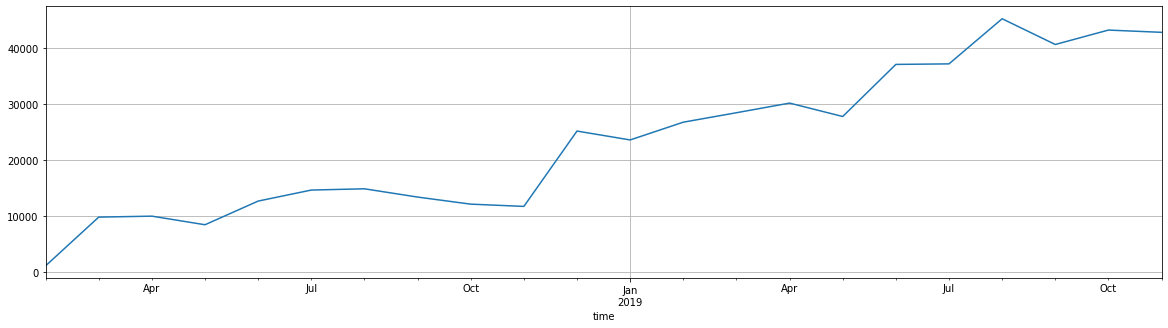

In [59]:
path = pd.DataFrame({'pnl': nq_.realizedPNL.resample('M').sum()})
path['path'] = path['pnl'].cumsum()
path['path'].plot(figsize=(20,5), grid=True);

In [61]:
import sys
sys.path.append('/home/tomek/ib_tools')
from datastore_pytables import Store

In [62]:
store = Store()

In [63]:
store.keys()

['/cont/min/CL_20191120_NYMEX_USD',
 '/cont/min/ES_20191220_GLOBEX_USD',
 '/cont/min/GC_20191227_NYMEX_USD',
 '/cont/min/GE_20191216_GLOBEX_USD',
 '/cont/min/NKD_20191212_GLOBEX_USD',
 '/cont/min/NQ_20191220_GLOBEX_USD',
 '/cont/min/YM_20191220_ECBOT_USD',
 '/cont/min/ZB_20191219_ECBOT_USD',
 '/cont/min/ZF_20191231_ECBOT_USD',
 '/cont/min/ZN_20191219_ECBOT_USD']

In [65]:
prices = store.read('/cont/min/NQ_20191220_GLOBEX_USD')

In [66]:
prices

,open,high,low,close,volume,average,barCount
date,,,,,,,
2019-11-01 18:00:00,8123.25,8124.25,8121.25,8123.75,313,8122.750,135
2019-11-01 17:59:00,8123.50,8124.25,8121.50,8123.25,475,8122.925,237
2019-11-01 17:58:00,8123.50,8125.25,8122.25,8123.50,579,8123.700,280
2019-11-01 17:57:00,8126.75,8126.75,8123.25,8123.25,711,8124.975,352
2019-11-01 17:56:00,8126.25,8127.50,8126.25,8126.75,292,8126.900,158
...,...,...,...,...,...,...,...
2017-03-13 11:06:00,5390.00,5390.00,5390.00,5390.00,0,5390.000,0
2017-03-13 11:05:00,5390.00,5390.00,5390.00,5390.00,0,5390.000,0
2017-03-13 11:04:00,5390.00,5390.00,5390.00,5390.00,0,5390.000,0


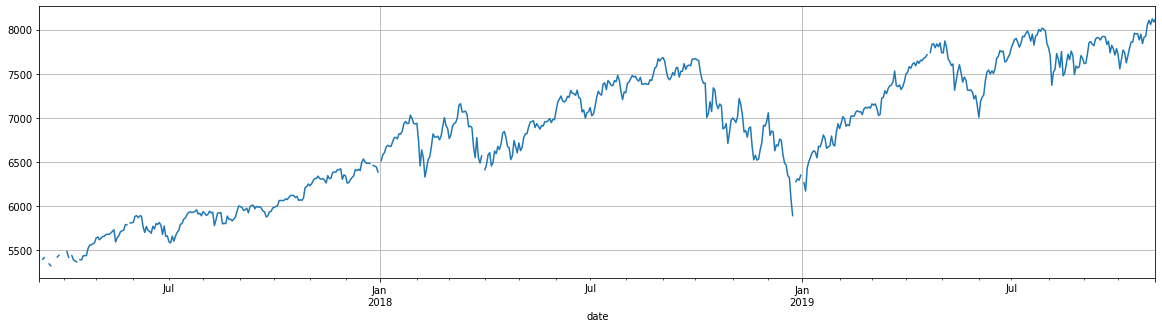

In [71]:
prices.open.resample('B').last().plot(figsize=(20,5), grid=True);

In [98]:
r = pd.DataFrame({'price': prices.close.resample('B').last(),
                 'ret': ret_1.path})
r

,price,ret
2017-03-13,5390.00,NaN
2017-03-14,NaN,NaN
2017-03-15,5399.00,NaN
2017-03-16,5416.50,NaN
2017-03-17,NaN,NaN
...,...,...
2019-10-28,8105.25,0.321153
2019-10-29,8057.50,0.345680
2019-10-30,8121.00,0.345680
2019-10-31,8086.25,0.342640


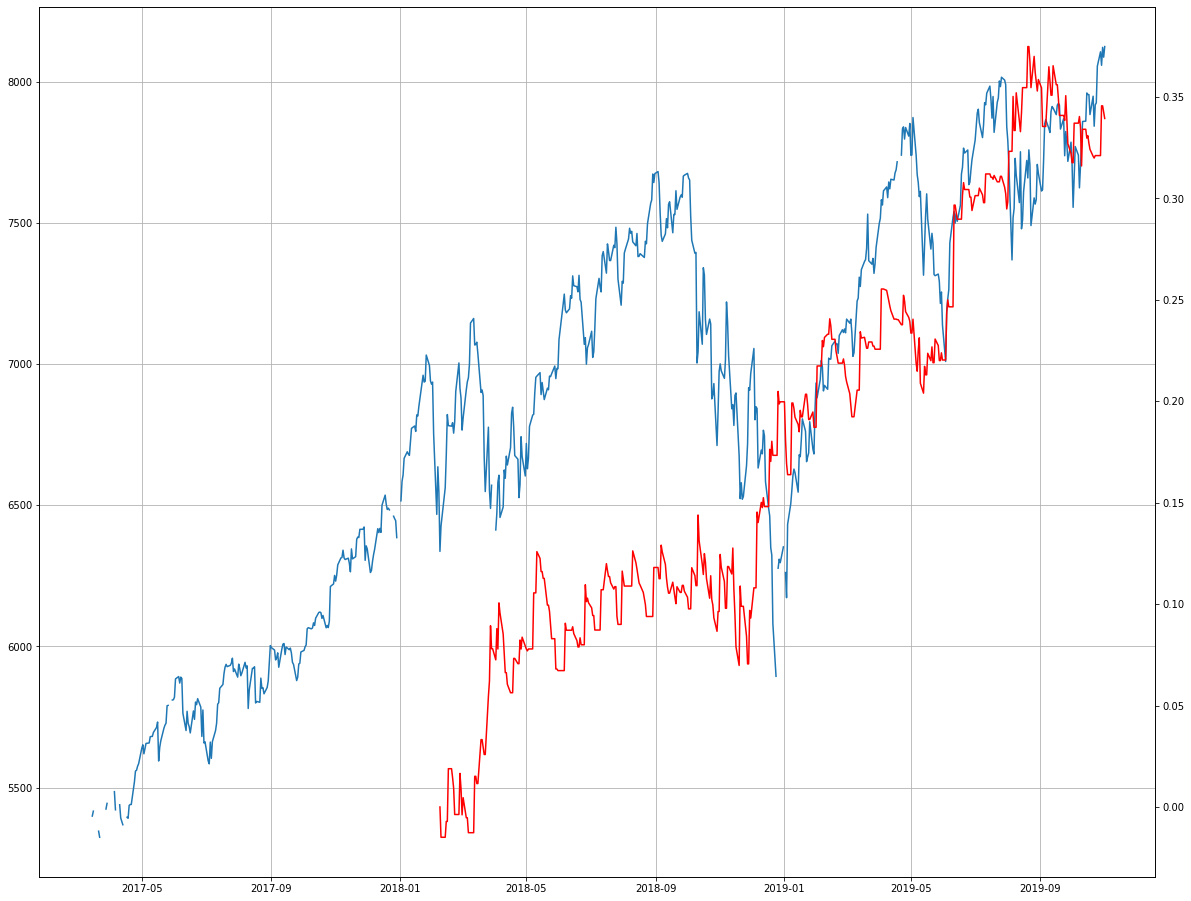

In [99]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20, 16))
ax = fig.add_subplot(111)
ax.plot(r.price)
ax1 = ax.twinx()
#fig.add_subplot(111, sharey=None)
ax1.plot(r.ret, color='red')
ax.grid()
plt.show();
#r.plot(figsize=(20,10), grid=True, sharex=False);